<a href="https://colab.research.google.com/github/Meojung1624/CodeReviewTest/blob/main/%EC%A7%80%ED%95%98%EC%B2%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_station=pd.read_csv('/content/drive/MyDrive/오픈소스/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='EUC-KR')

In [6]:
train_station.shape

(69931, 52)

In [7]:
train_station = train_station.drop(columns=['작업일자'])

In [8]:
# 승차 관련 컬럼만 필터링
in_subway= train_station.columns.tolist()[:3]
for a in train_station.columns.tolist():
    if a.find('승차')!= -1 :
        in_subway.append(a)

in_subway_df = train_station[in_subway]

in_subway_df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
0,202410,1호선,동대문,634,12458,10170,16816,22735,21717,19779,...,27302,19500,16751,14611,11413,5815,771,4,0,0
1,202410,1호선,동묘앞,223,3169,3758,9258,14474,12702,14026,...,23880,10429,6004,5039,3529,1240,106,0,0,0
2,202410,1호선,서울역,573,8623,14928,42711,76589,72617,71262,...,231709,126822,91606,92370,59400,29792,2848,1,0,0
3,202410,1호선,시청,84,2078,4249,8265,11334,15004,18452,...,166376,68640,60913,51491,30800,10346,506,1,0,0
4,202410,1호선,신설동,384,9813,10345,22756,33583,23917,21082,...,53797,21330,14593,12472,8783,3887,375,0,0,0


In [9]:
# 하차 관련 컬럼만 필터링
out_subway= train_station.columns.tolist()[:3]
for a in train_station.columns.tolist():
    if a.find('하차')!= -1 :
        out_subway.append(a)

out_subway_df = train_station[out_subway]

out_subway_df.head()

,사용월,호선명,지하철역,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
0,202410,1호선,동대문,22,1990,7253,12049,21186,24095,26622,...,24323,23707,16407,15385,14530,9969,2838,231,0,0
1,202410,1호선,동묘앞,4,1026,5319,10158,21962,19323,26098,...,12636,9695,6919,7060,6902,4882,1831,263,0,0
2,202410,1호선,서울역,9,9367,61884,117041,237308,161142,91617,...,98042,69485,49871,45709,29520,13969,3802,207,0,0
3,202410,1호선,시청,1,5753,30299,74509,195324,98041,57341,...,27233,13765,9798,8905,6197,3775,979,41,0,0
4,202410,1호선,신설동,22,2340,10232,26027,55972,33748,22860,...,32654,23384,16683,16665,14547,9779,2781,1,1,0


In [10]:
# 호선별
in_station_group=in_subway_df.groupby(['호선명','지하철역']).sum()
in_station_group=in_station_group.drop(['사용월'],axis=1)

In [11]:
# 호선별
out_station_group=out_subway_df.groupby(['호선명','지하철역']).sum()
out_station_group=out_station_group.drop(['사용월'],axis=1)

In [12]:
in_station_group.loc['1호선'].style.background_gradient(cmap='Blues')

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
동대문,74325,1568512,1220975,1938396,2611461,2499800,2277088,2456963,3007273,3279004,3459970,3553664,3586725,3587435,3453118,2467688,1996102,1839454,1536151,774685,83858,1056,16,0
동묘앞,15887,358801,421456,799562,1152026,1059647,1208145,1740808,2407154,3122165,3583885,3957969,4106074,3751668,3062394,1522858,864678,724952,499552,215417,21215,262,15,15
서울역,102953,1209718,1603690,4771879,8577190,7096257,7235118,9072665,10369259,10332777,8794123,11818942,12755805,17523429,25459936,14299635,10130737,10504500,7533862,3385940,387378,4230,20,1
시청,8005,260166,418791,848446,1114620,1381210,1705409,2384629,2646430,3320596,4162845,5325672,6183016,9036700,17032242,7866530,6361771,6255210,4076865,1417810,96054,2777,21,0
신설동,34782,1009354,1137331,2400088,3349254,2420171,2202347,2506427,2707328,2963020,2898043,3166035,3643790,4785464,7045137,3192267,2054114,1860148,1352894,550298,46371,299,13,1
제기동,39890,567167,1039168,2651161,3753063,2805437,3094132,4025487,4752773,5210201,5714790,6316747,6240903,5602348,5147406,2688683,1666055,1276529,860978,347171,22284,299,13,0
종각,12759,455157,522028,837524,1374258,1691650,2329025,3537427,4393049,5793267,6810730,8269497,9459592,15097134,25510329,13160092,11143668,12744009,10173134,4503685,377810,9480,77,0
종로3가,20100,542352,483388,723437,1205901,1695578,2729930,4248454,5582680,6890042,7688033,8721593,9602944,10556702,12947497,9148130,6853030,7462234,6075160,2515610,268913,4567,31,1
종로5가,6002,236918,361903,642004,1078334,1553428,2501022,3737254,4825144,5923874,6831005,7411450,7745371,9523618,12671385,7299720,4775495,4141429,2917762,1033745,62624,505,10,0


In [13]:
out_station_group.loc['1호선'].style.background_gradient(cmap='Blues')

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
동대문,1531,251294,884306,1586826,3212290,3205942,3241227,3709497,3751255,3630794,3513140,3321184,3094664,3071808,3132284,3185690,2333263,1901232,1738348,1409372,411954,11784,312,0
동묘앞,336,105624,498799,1170974,2944473,2116942,2318914,3090687,3492287,3898562,3749687,3217447,2443485,1859803,1389809,988292,695884,691138,728810,485919,297734,25643,1049,0
서울역,3423,971061,5715680,12270932,25267269,16452181,9142795,8222216,9001425,9165738,8710321,9158052,9496436,10440833,11287289,8294824,5836537,5162447,3985714,2070116,633351,46532,1026,0
시청,296,518256,2586880,8098801,20998076,9553223,4933425,4725321,4411854,4671666,4070896,3490600,3132278,3164623,3173478,1782791,1016194,877799,669909,410137,112774,3292,124,0
신설동,1739,284855,1043860,3082763,7851764,4445441,2771370,2489769,2448739,2565219,2399934,2491303,2538641,2981015,3410932,2672371,1778158,1712990,1621693,1125825,259597,2543,164,0
제기동,600,275557,1086696,2302099,5199885,4361764,4733854,5647051,5999118,6278607,5860338,5063720,4111212,3385644,3256414,2452624,1516757,1379447,1275024,841854,176306,1381,14,0
종각,404,562742,3173459,12116287,29720959,16956431,7997526,7389848,6824492,7056758,6046159,5321326,5419609,6266039,7783591,4907822,2035451,1307426,907576,585265,135314,1780,73,0
종로3가,1370,321931,1531797,3284428,9193499,9818901,8282764,8705111,8796062,8776952,7808895,6493878,5721915,5443322,5900336,3628820,1577122,1149435,886059,605854,248921,5557,166,0
종로5가,169,410701,1806654,4965123,13004511,8417549,6713190,7008495,6784068,6351424,6006259,5250483,4630870,4193058,3922035,2433295,1172119,848035,620653,393403,111613,1117,43,0


In [14]:
train_station

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202410,1호선,동대문,634,22,12458,1990,10170,7253,16816,...,5815,9969,771,2838,4,231,0,0,0,0
1,202410,1호선,동묘앞,223,4,3169,1026,3758,5319,9258,...,1240,4882,106,1831,0,263,0,0,0,0
2,202410,1호선,서울역,573,9,8623,9367,14928,61884,42711,...,29792,13969,2848,3802,1,207,0,0,0,0
3,202410,1호선,시청,84,1,2078,5753,4249,30299,8265,...,10346,3775,506,979,1,41,0,0,0,0
4,202410,1호선,신설동,384,22,9813,2340,10345,10232,22756,...,3887,9779,375,2781,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69926,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,111,633,3,222,0,0,0,0,0,0
69927,201501,중앙선,원덕,1,0,292,4,415,46,537,...,8,383,3,157,0,0,0,0,0,0
69928,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,1619,6501,86,1617,0,0,0,0,0,0
69929,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,107,336,8,85,0,0,0,0,0,0


In [15]:
# 1. 날짜 정보 분리 및 추가
train_station['연도'] = train_station['사용월'] // 100
train_station['월'] = train_station['사용월'] % 100

In [16]:
# 2. 시간대별 혼잡도를 계산하는 함수 (전체 합계)
def cal_congestion(station):
    station_data = train_station[train_station['지하철역'] == station]
    time_columns = [col for col in train_station.columns if '승차인원' in col]
    time_data = station_data[time_columns].sum().reset_index()
    time_data.columns = ['시간대', '승차인원']
    time_data['시간대'] = time_data['시간대'].str.extract(r'(​?\d{2}시-\d{2}시)')
    return time_data

In [17]:
# 3. 출근시간대(07시-08시) 승차 데이터 추출
def peak_hour_analysis():
    train_station['07시-08시 승차인원'] = train_station['07시-08시 승차인원']
    peak_data = train_station.groupby('지하철역')['07시-08시 승차인원'].sum().reset_index()
    busiest_station = peak_data.loc[peak_data['07시-08시 승차인원'].idxmax()]
    return peak_data, busiest_station

In [18]:
# 4. 월별/연도별 승객 추이
def monthly_trend():
    monthly_data = train_station.groupby(['연도', '월']).sum().reset_index()
    monthly_data = monthly_data[['연도', '월'] + [col for col in train_station.columns if '승차인원' in col]]
    return monthly_data

In [19]:
# 결과 확인용 함수들 정의
def plot_congestion(station):
    import matplotlib.pyplot as plt
    station_data = cal_congestion(station)
    plt.figure(figsize=(12, 6))
    plt.bar(station_data['시간대'], station_data['승차인원'], color='skyblue')
    plt.title(f'{station} 시간대별 혼잡도', fontsize=16)
    plt.xlabel('시간대', fontsize=12)
    plt.ylabel('승차인원', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

def plot_monthly_trend():
    import matplotlib.pyplot as plt
    trend_data = monthly_trend()
    plt.figure(figsize=(12, 6))
    for year in trend_data['연도'].unique():
        yearly_data = trend_data[trend_data['연도'] == year]
        plt.plot(yearly_data['월'], yearly_data.iloc[:, 2:].sum(axis=1), label=f'{year}년')
    plt.title('월별 지하철 이용객 추이', fontsize=16)
    plt.xlabel('월', fontsize=12)
    plt.ylabel('이용객 수', fontsize=12)
    plt.legend()
    plt.show()

# 데이터 정제 완료 및 주요 함수 정의

In [20]:
"""
- 특정 승차역의 시간대별 혼잡도: plot_congestion('역 이름')
- 출근시간대 가장 붐비는 역 분석: peak_hour_analysis()
- 월별 이용객 추이 시각화: plot_monthly_trend()
"""

"\n- 특정 승차역의 시간대별 혼잡도: plot_congestion('역 이름')\n- 출근시간대 가장 붐비는 역 분석: peak_hour_analysis()\n- 월별 이용객 추이 시각화: plot_monthly_trend()\n"

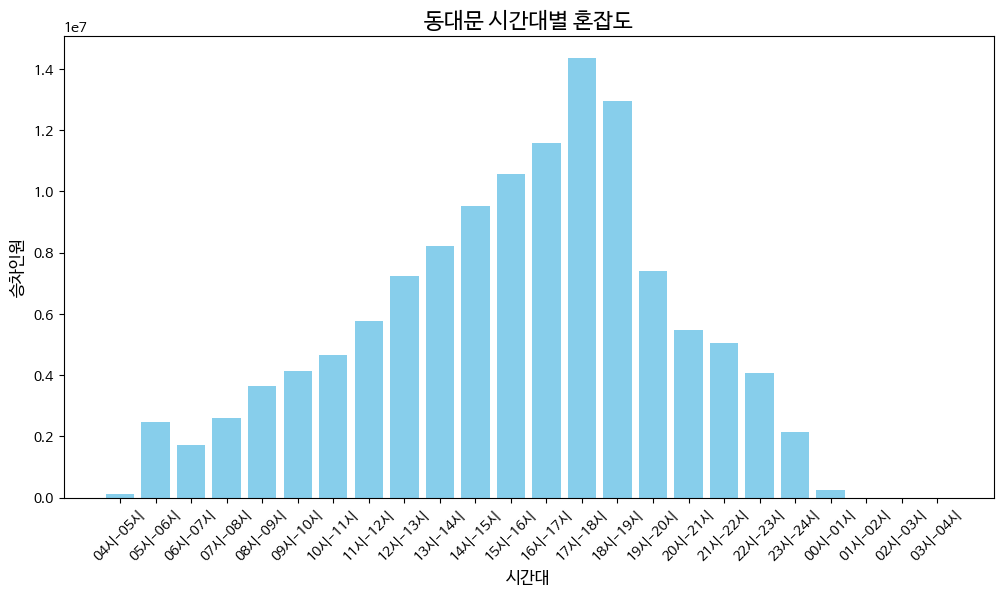

In [21]:
plot_congestion('동대문')

In [22]:
peak_hour_analysis()

(          지하철역  07시-08시 승차인원
 0     4.19민주묘지        662932
 1           가능       3010839
 2         가락시장       3670703
 3      가산디지털단지       4286777
 4           가양       8952495
 ..         ...           ...
 593         회룡       6939651
 594         회현        139851
 595  회현(남대문시장)        540176
 596      효창공원앞       2343928
 597  흑석(중앙대입구)       2060105
 
 [598 rows x 2 columns],
 지하철역                  신림
 07시-08시 승차인원    25680756
 Name: 345, dtype: object)

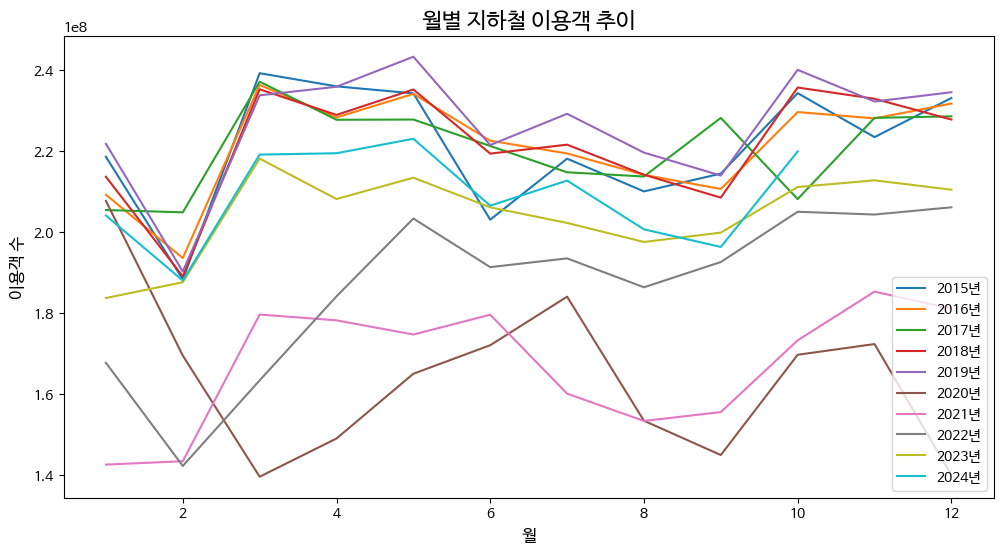

In [23]:
plot_monthly_trend()